In [2]:
! pip install kagglehub



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Роман\.cache\kagglehub\datasets\ruchi798\data-science-job-salaries\versions\1


In [135]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'



df = pd.read_csv('ds_salaries.csv')


In [136]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [137]:
df = df.drop('Unnamed: 0',axis =1)

In [138]:
df.shape

(607, 11)

In [139]:
import numpy as np
df = df.assign(log_salary_in_usd = np.log1p(df['salary_in_usd']))
df = df.drop('salary_in_usd',axis=1)

In [148]:
numeric_columns = df.loc[:,df.dtypes != object].columns
df.describe()

,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,log_salary_in_usd,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,2020,2021,2022
count,607.000000,6.070000e+02,607.000000,607.000000,607.00000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,11.397414,3.240001e+05,11.397414,11.397414,70.92257,11.397414,11.397414,0.042834,0.350906,0.461285,0.006590,0.968699,0.016474,0.537068,0.136738,0.118616,0.357496,0.523888
std,0.354769,1.544357e+06,0.476012,0.607802,40.70913,0.582895,0.774123,0.202649,0.477647,0.498910,0.080976,0.174275,0.127396,0.499035,0.343854,0.323603,0.479658,0.499841
min,8.596004,4.000000e+03,9.189118,8.294300,0.00000,8.294300,7.958577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.299194,7.000000e+04,11.245866,11.240060,50.00000,11.188124,11.046547,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.351508,1.150000e+05,11.668180,11.826874,100.00000,11.763962,11.528513,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,11.467396,1.650000e+05,11.668180,11.826874,100.00000,11.763962,11.918397,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,12.911645,3.040000e+07,11.714617,12.206078,100.00000,11.848129,13.304687,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
numeric_columns

Index(['work_year', 'salary', 'remote_ratio', 'log_salary_in_usd'], dtype='object')

In [96]:
df[numeric_columns].corr()

,work_year,salary,remote_ratio,log_salary_in_usd
work_year,1.000000,-0.087577,0.076314,0.262747
salary,-0.087577,1.000000,-0.014608,-0.101227
remote_ratio,0.076314,-0.014608,1.000000,0.143121
log_salary_in_usd,0.262747,-0.101227,0.143121,1.000000


In [97]:
### Секретные функции для фильтрации признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
work_year     log_salary_in_usd    0.262747
remote_ratio  log_salary_in_usd    0.143121
salary        log_salary_in_usd    0.101227
work_year     salary               0.087577
              remote_ratio         0.076314
salary        remote_ratio         0.014608
dtype: float64


In [98]:
### Посмотрим на квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold


cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

df[constant_cols] 

""
0
1
2
3
4
...
602
603
604
605


In [141]:
### Посмотрим на категориальные колонки

categoricaL_columns = df.loc[:,df.dtypes == object].columns

### Изучим их

df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


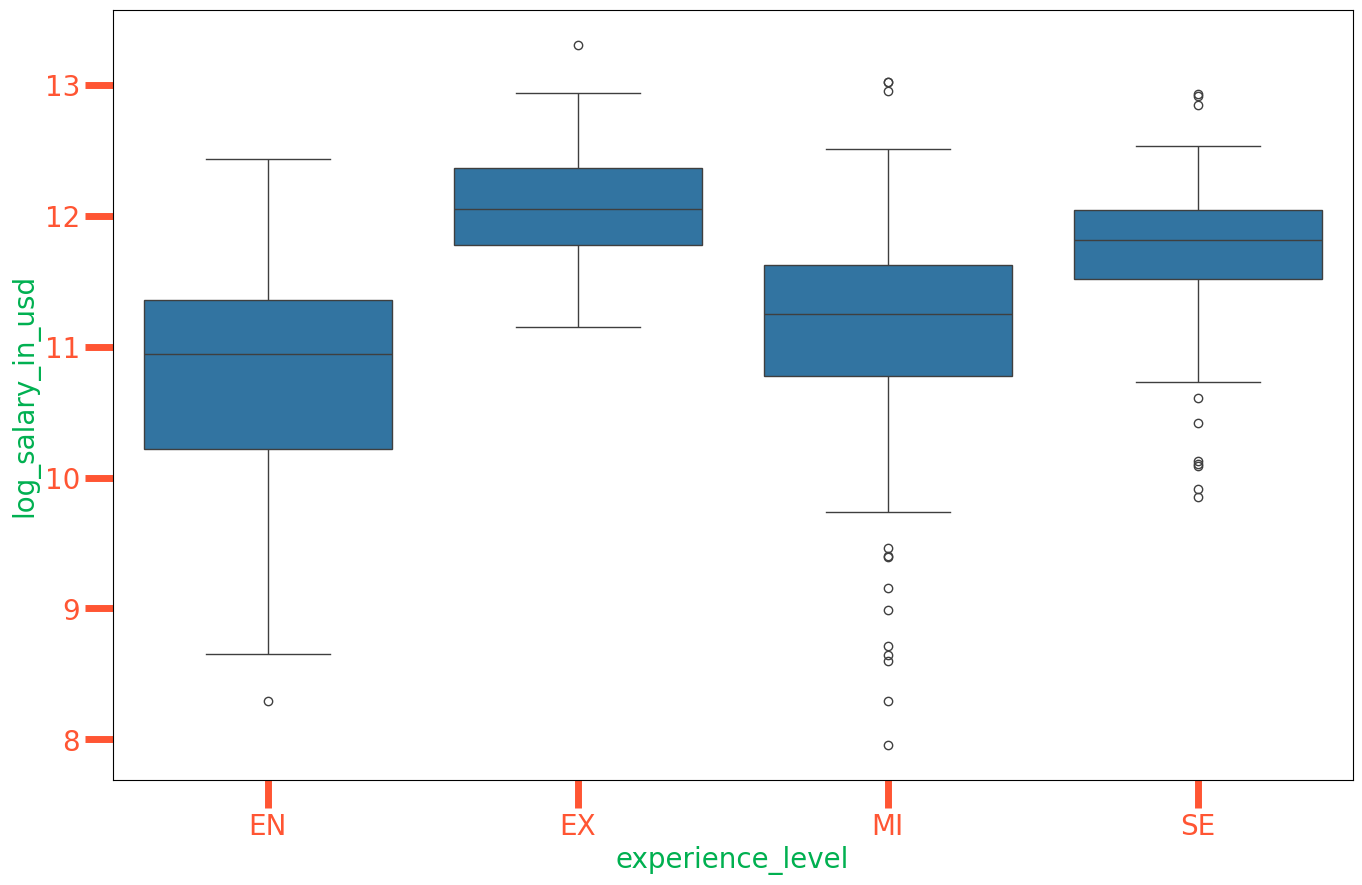

In [100]:
### Распределения таргета по этажу

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_salary_in_usd', x=df['experience_level'].astype('category'), data=df)
plt.show()

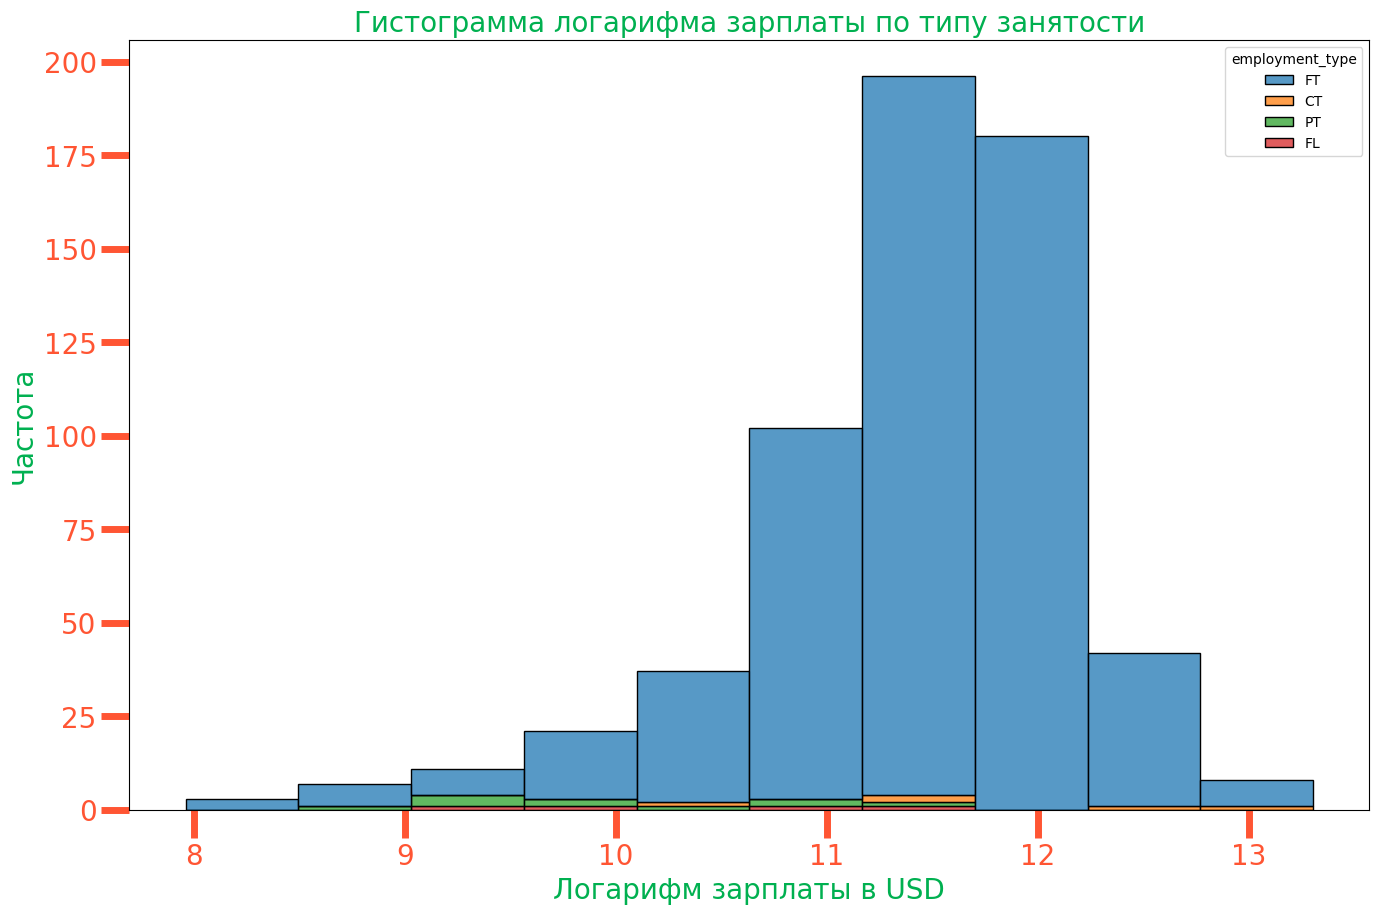

In [105]:
plt.figure(figsize=(16, 10))
sns.histplot(data=df, x='log_salary_in_usd', hue='employment_type', multiple='stack', bins=10)
plt.title('Гистограмма логарифма зарплаты по типу занятости')
plt.xlabel('Логарифм зарплаты в USD')
plt.ylabel('Частота')
plt.show()

### EDA АНАЛИЗ

In [108]:
print(df.dtypes)

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                  int64
salary_currency        object
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
log_salary_in_usd     float64
dtype: object


In [109]:
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
log_salary_in_usd     0
dtype: int64


In [110]:
print(df.describe())

         work_year        salary  remote_ratio  log_salary_in_usd
count   607.000000  6.070000e+02     607.00000         607.000000
mean   2021.405272  3.240001e+05      70.92257          11.397414
std       0.692133  1.544357e+06      40.70913           0.774123
min    2020.000000  4.000000e+03       0.00000           7.958577
25%    2021.000000  7.000000e+04      50.00000          11.046547
50%    2022.000000  1.150000e+05     100.00000          11.528513
75%    2022.000000  1.650000e+05     100.00000          11.918397
max    2022.000000  3.040000e+07     100.00000          13.304687


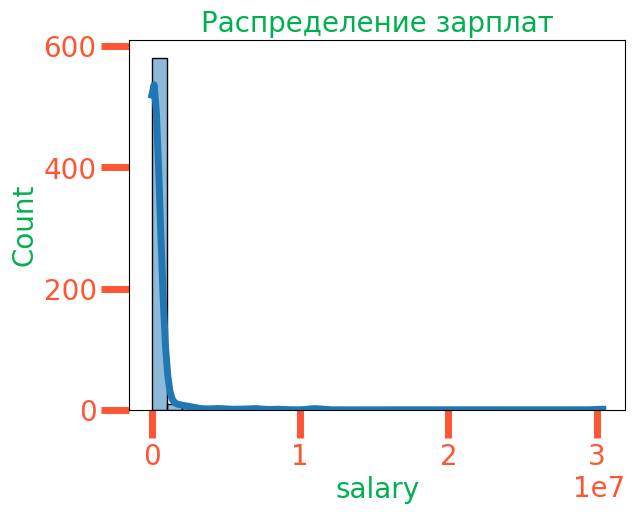

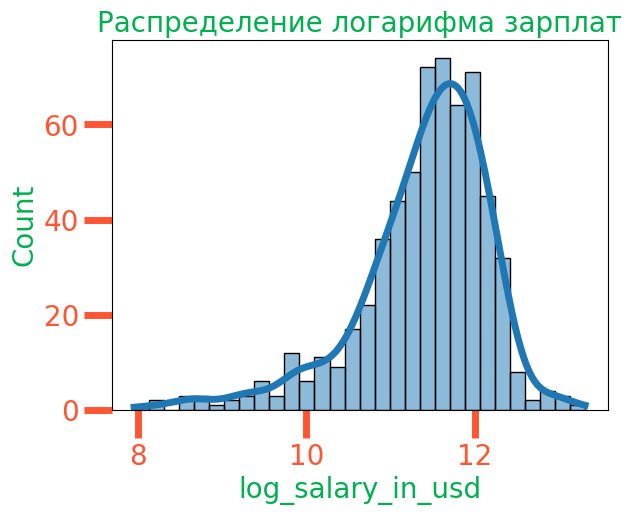

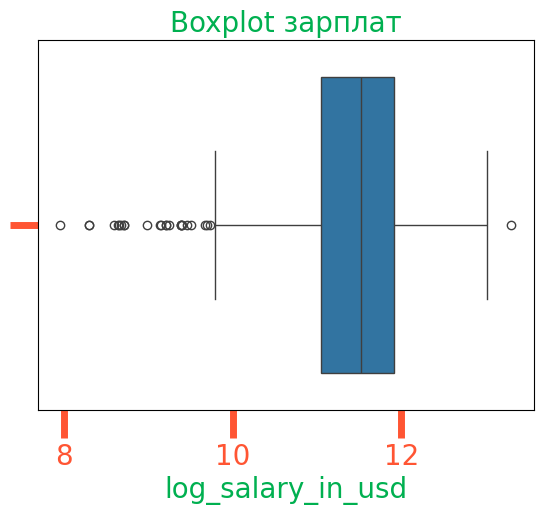

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма зарплат
sns.histplot(df['salary'], bins=30, kde=True)
plt.title("Распределение зарплат")
plt.show()

# Гистограмма логарифма зарплат
sns.histplot(df['log_salary_in_usd'], bins=30, kde=True)
plt.title("Распределение логарифма зарплат")
plt.show()

# Boxplot зарплат
sns.boxplot(x=df['log_salary_in_usd'])
plt.title("Boxplot зарплат")
plt.show()


In [114]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,log_salary_in_usd
0,2020,MI,FT,Data Scientist,70000,EUR,DE,0,DE,L,11.287705
1,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S,12.468441
2,2020,SE,FT,Big Data Engineer,85000,GBP,GB,50,GB,M,11.599332
3,2020,MI,FT,Product Data Analyst,20000,USD,HN,0,HN,S,9.903538
4,2020,SE,FT,Machine Learning Engineer,150000,USD,US,50,US,L,11.918397
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,US,100,US,M,11.944714
603,2022,SE,FT,Data Engineer,126000,USD,US,100,US,M,11.744045
604,2022,SE,FT,Data Analyst,129000,USD,US,0,US,M,11.767575
605,2022,SE,FT,Data Analyst,150000,USD,US,100,US,M,11.918397


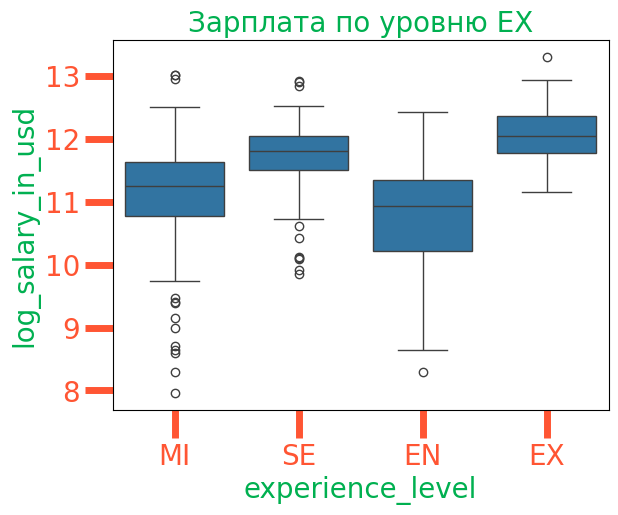

In [116]:
sns.boxplot(x="experience_level", y="log_salary_in_usd", data=df)
plt.title("Зарплата по уровню EX")
plt.show()


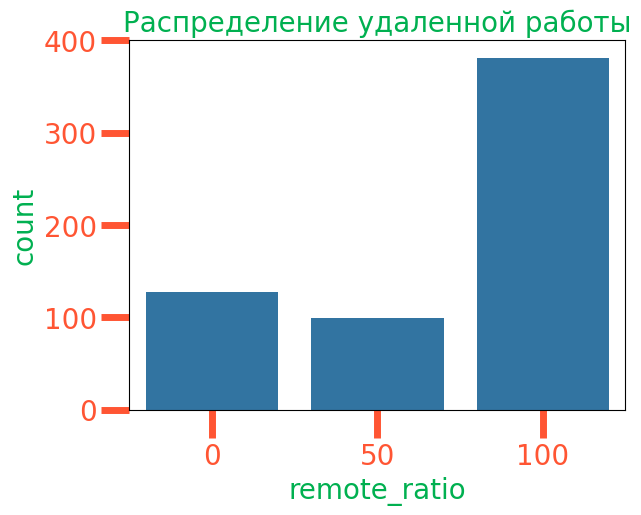

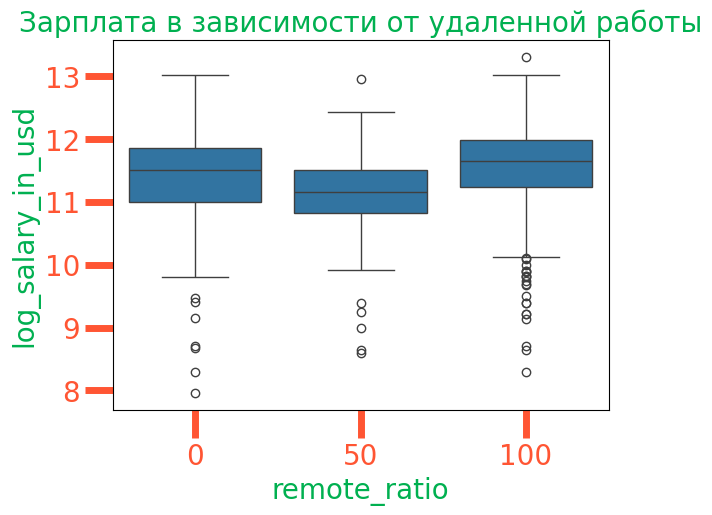

In [117]:
# Распределение удаленной работы
sns.countplot(x="remote_ratio", data=df)
plt.title("Распределение удаленной работы")
plt.show()

# Влияние удаленной работы на зарплату
sns.boxplot(x="remote_ratio", y="log_salary_in_usd", data=df)
plt.title("Зарплата в зависимости от удаленной работы")
plt.show()


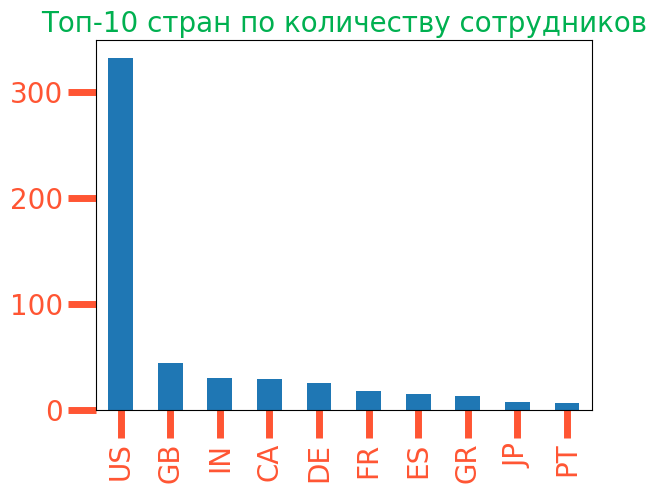

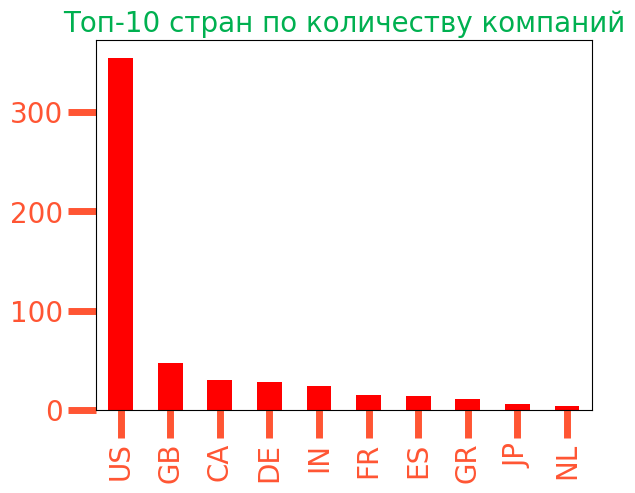

In [118]:
# Топ-10 стран сотрудников
top_countries = df["employee_residence"].value_counts().head(10)
top_countries.plot(kind="bar")
plt.title("Топ-10 стран по количеству сотрудников")
plt.show()

# Топ-10 стран компаний
top_companies = df["company_location"].value_counts().head(10)
top_companies.plot(kind="bar", color="red")
plt.title("Топ-10 стран по количеству компаний")
plt.show()


In [142]:
### Преобразуем категориальные колонки

for col in categoricaL_columns: 
    if df[col].nunique() < 5:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

    else:
        mean_target = df.groupby(col)['log_salary_in_usd'].mean()
        df[col] = df[col].map(mean_target)

In [143]:
df = df.sort_values('work_year')
df

,work_year,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,log_salary_in_usd,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S
0,2020,11.351508,70000,10.982704,11.240060,0,11.188124,11.287705,0,1,0,0,1,0,0,0
51,2020,11.299194,91000,11.668180,11.826874,100,11.763962,11.418626,0,0,0,0,1,0,0,0
50,2020,11.299194,450000,9.912597,10.055604,0,9.979979,8.711608,0,0,0,0,1,0,0,1
49,2020,11.467396,61500,10.982704,10.967866,50,10.996666,11.158249,0,1,0,0,1,0,0,0
48,2020,11.351508,105000,11.668180,11.826874,100,11.763962,11.561725,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022,10.591030,120000,11.668180,11.826874,0,11.763962,11.695255,0,1,0,0,1,0,1,0
390,2022,11.350402,75000,11.245866,11.241398,0,11.245355,11.494344,0,1,0,0,1,0,1,0
389,2022,11.350402,95000,11.245866,11.241398,0,11.245355,11.730727,0,1,0,0,1,0,1,0
396,2022,11.350402,80000,10.982704,10.967866,100,11.188124,11.384330,0,1,0,0,1,0,1,0


In [144]:
one_hot = pd.get_dummies(df['work_year'])
df = pd.concat((df.drop('work_year', axis=1), one_hot), axis=1)
df

,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,log_salary_in_usd,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,2020,2021,2022
0,11.351508,70000,10.982704,11.240060,0,11.188124,11.287705,0,1,0,0,1,0,0,0,1,0,0
51,11.299194,91000,11.668180,11.826874,100,11.763962,11.418626,0,0,0,0,1,0,0,0,1,0,0
50,11.299194,450000,9.912597,10.055604,0,9.979979,8.711608,0,0,0,0,1,0,0,1,1,0,0
49,11.467396,61500,10.982704,10.967866,50,10.996666,11.158249,0,1,0,0,1,0,0,0,1,0,0
48,11.351508,105000,11.668180,11.826874,100,11.763962,11.561725,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,10.591030,120000,11.668180,11.826874,0,11.763962,11.695255,0,1,0,0,1,0,1,0,0,0,1
390,11.350402,75000,11.245866,11.241398,0,11.245355,11.494344,0,1,0,0,1,0,1,0,0,0,1
389,11.350402,95000,11.245866,11.241398,0,11.245355,11.730727,0,1,0,0,1,0,1,0,0,0,1
396,11.350402,80000,10.982704,10.967866,100,11.188124,11.384330,0,1,0,0,1,0,1,0,0,0,1


### ОБУЧЕНИЕ МОДЕЛИ

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


In [130]:
numeric_columns

Index(['work_year', 'salary', 'remote_ratio', 'log_salary_in_usd'], dtype='object')

In [145]:
categoricaL_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [146]:
df

,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,log_salary_in_usd,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,2020,2021,2022
0,11.351508,70000,10.982704,11.240060,0,11.188124,11.287705,0,1,0,0,1,0,0,0,1,0,0
51,11.299194,91000,11.668180,11.826874,100,11.763962,11.418626,0,0,0,0,1,0,0,0,1,0,0
50,11.299194,450000,9.912597,10.055604,0,9.979979,8.711608,0,0,0,0,1,0,0,1,1,0,0
49,11.467396,61500,10.982704,10.967866,50,10.996666,11.158249,0,1,0,0,1,0,0,0,1,0,0
48,11.351508,105000,11.668180,11.826874,100,11.763962,11.561725,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,10.591030,120000,11.668180,11.826874,0,11.763962,11.695255,0,1,0,0,1,0,1,0,0,0,1
390,11.350402,75000,11.245866,11.241398,0,11.245355,11.494344,0,1,0,0,1,0,1,0,0,0,1
389,11.350402,95000,11.245866,11.241398,0,11.245355,11.730727,0,1,0,0,1,0,1,0,0,0,1
396,11.350402,80000,10.982704,10.967866,100,11.188124,11.384330,0,1,0,0,1,0,1,0,0,0,1


In [157]:
numeric_columns

Index([          'job_title',              'salary',     'salary_currency',
        'employee_residence',        'remote_ratio',    'company_location',
         'log_salary_in_usd', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE',  'employment_type_FL',  'employment_type_FT',
        'employment_type_PT',      'company_size_M',      'company_size_S',
                        2020,                  2021,                  2022],
      dtype='object')

In [151]:
df.columns = df.columns.astype(str)

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

num_features = ["remote_ratio", "company_size_M", "company_size_S", "2020", "2021", "2022"]
cat_features = ["job_title", "salary_currency", "employee_residence", "company_location", 
                "experience_level_EX", "experience_level_MI", "experience_level_SE", 
                "employment_type_FL", "employment_type_FT", "employment_type_PT"]

# Кодирование категориальных признаков
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = encoder.fit_transform(df[cat_features])


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")


MSE: 0.2742624771601624
R²: 0.5912399646228294
MAE: 0.35807999094418047


In [176]:
X = np.hstack((X_num,X_cat))
y = df['log_salary_in_usd']